In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


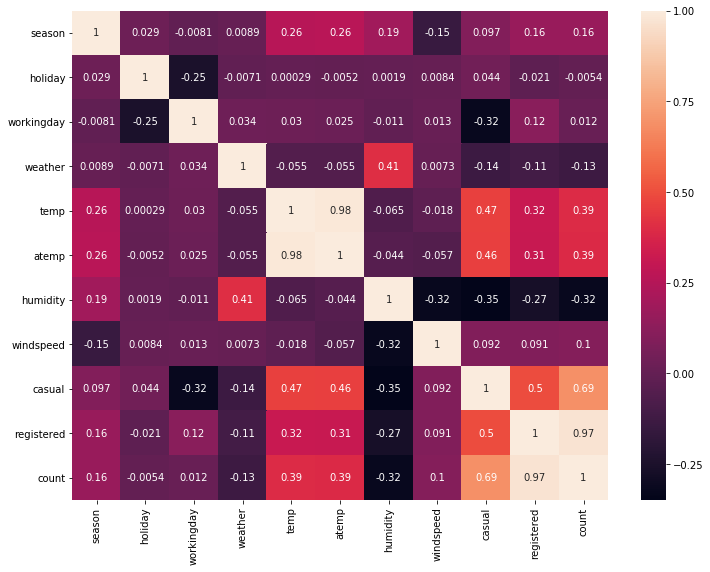

In [3]:
fig,ax=plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

In [4]:
df.loc[(df['holiday']==0) & (df['workingday']==0)].replace(to_replace='holiday',value=1,inplace=True)

c:\users\new u\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


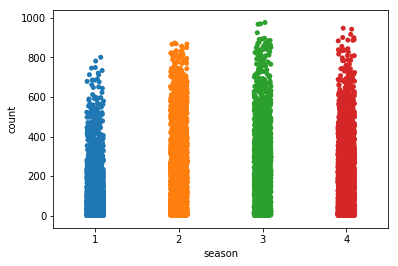

In [6]:
sns.stripplot(x=df['season'],y=df['count'],jitter=True)

In [7]:
df[df['season']==1]['count'].describe()

count    2686.000000
mean      116.343261
std       125.273974
min         1.000000
25%        24.000000
50%        78.000000
75%       164.000000
max       801.000000
Name: count, dtype: float64

In [8]:
Hour=df['datetime'].apply(lambda x:x.split())
h=[]
h=[int(x[-1].split(':')[0]) for x in Hour.tolist()]

In [9]:
Hour=h

In [10]:
df.insert(loc=0,column='Hour',value=Hour)

In [11]:
df.head()

,Hour,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
df.drop('datetime',inplace=True,axis=1)
df.drop('casual',inplace=True,axis=1)
df.drop('registered',inplace=True,axis=1)

In [13]:
df.tail()

,Hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
10881,19,4,0,1,1,15.58,19.695,50,26.0027,336
10882,20,4,0,1,1,14.76,17.425,57,15.0013,241
10883,21,4,0,1,1,13.94,15.910,61,15.0013,168
10884,22,4,0,1,1,13.94,17.425,61,6.0032,129
10885,23,4,0,1,1,13.12,16.665,66,8.9981,88


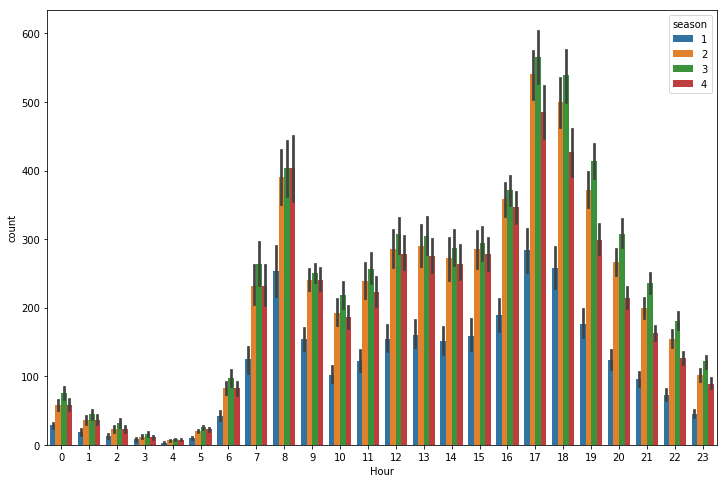

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(y=df["count"],x=df["Hour"],hue=df['season'])

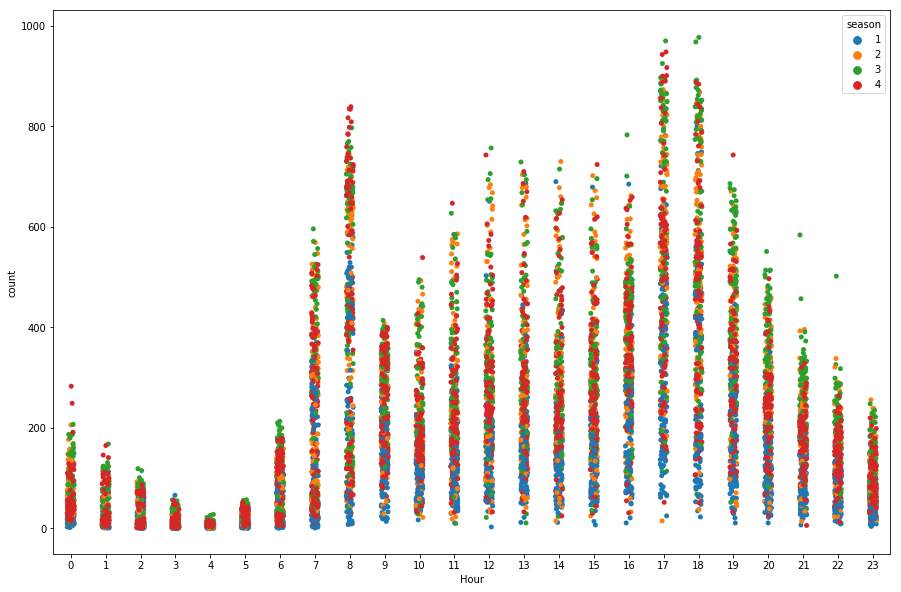

In [20]:
plt.figure(figsize=(15,10))
sns.stripplot(df['Hour'],df['count'],jitter=True,hue=df['season'])

c:\users\new u\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


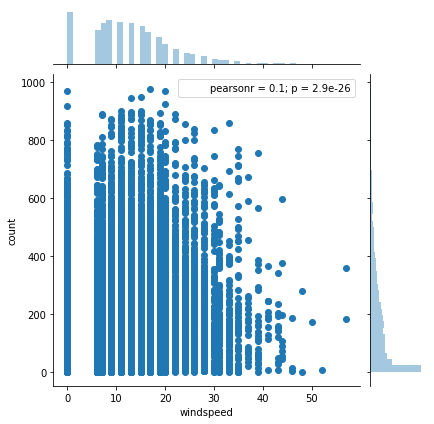

In [25]:
sns.jointplot(df['windspeed'],df['count'])

In [148]:
X=df.drop("count",axis=1)
y=df["count"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [149]:
df2 = pd.read_csv('test.csv')

In [150]:
df2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [151]:
Hour=df2['datetime'].apply(lambda x:x.split())
h=[]
h=[int(x[-1].split(':')[0]) for x in Hour.tolist()]

In [152]:
Hour=h

In [153]:
df2.insert(loc=0,column='Hour',value=Hour)

In [154]:
df2.drop('datetime',inplace=True,axis=1)

In [155]:
df2.tail()

,Hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,19,1,0,1,2,10.66,12.880,60,11.0014
6489,20,1,0,1,2,10.66,12.880,60,11.0014
6490,21,1,0,1,1,10.66,12.880,60,11.0014
6491,22,1,0,1,1,10.66,13.635,56,8.9981
6492,23,1,0,1,1,10.66,13.635,65,8.9981


In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
lr = LinearRegression()

In [160]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
X.tail()

,Hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
10881,19,4,0,1,1,15.58,19.695,50,26.0027
10882,20,4,0,1,1,14.76,17.425,57,15.0013
10883,21,4,0,1,1,13.94,15.910,61,15.0013
10884,22,4,0,1,1,13.94,17.425,61,6.0032
10885,23,4,0,1,1,13.12,16.665,66,8.9981


In [163]:
predictions = lr.predict(df2)

In [164]:
predictions[:5]

array([14.60932306, 22.67897488, 30.25933858, 38.55025687, 46.13062057])

In [165]:
lr.predict(X)

array([-38.97652966, -34.39401597, -26.81365226, ..., 251.00088407,
       262.0091866 , 254.29019136])

In [166]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64